<a href="https://colab.research.google.com/github/AmandaGit01/Repositorio_minicurso/blob/main/Classificando_qualidade_de_Caf%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Variáveis de entrada
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
acucar = ctrl.Antecedent(np.arange(0, 11, 1), 'acucar')

# Variável de saída
qualidade = ctrl.Consequent(np.arange(0, 11, 1), 'qualidade')

In [ ]:
# Funções de pertinência para temperatura
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [0, 0, 20, 40])
temperatura['média'] = fuzz.trimf(temperatura.universe, [20, 40, 60])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [40, 60, 80])
temperatura['muito_alta'] = fuzz.trapmf(temperatura.universe, [60, 80, 100, 100])

# Funções de pertinência para açúcar
acucar['nenhum'] = fuzz.trimf(acucar.universe, [0, 0, 2])
acucar['pouco'] = fuzz.trimf(acucar.universe, [0, 2, 6])
acucar['médio'] = fuzz.trimf(acucar.universe, [2, 6, 8])
acucar['muito'] = fuzz.trimf(acucar.universe, [6, 10, 10])

# Funções de pertinência para qualidade
qualidade['ruim'] = fuzz.trapmf(qualidade.universe, [0, 0, 2, 4])
qualidade['regular'] = fuzz.trimf(qualidade.universe, [2, 4, 6])
qualidade['bom'] = fuzz.trimf(qualidade.universe, [4, 6, 8])
qualidade['excelente'] = fuzz.trapmf(qualidade.universe, [6, 8, 10, 10])

In [ ]:
# Bastantes regras
#'''
regra1 = ctrl.Rule(temperatura['baixa'] & acucar['nenhum'], qualidade['ruim'])
regra2 = ctrl.Rule(temperatura['média'] & acucar['nenhum'], qualidade['regular'])
regra3 = ctrl.Rule(temperatura['alta'] & acucar['nenhum'], qualidade['ruim'])
regra4 = ctrl.Rule(temperatura['muito_alta'] & acucar['nenhum'], qualidade['excelente'])
regra5 = ctrl.Rule(temperatura['baixa'] & acucar['pouco'], qualidade['regular'])
regra6 = ctrl.Rule(temperatura['média'] & acucar['pouco'], qualidade['bom'])
regra7 = ctrl.Rule(temperatura['alta'] & acucar['pouco'], qualidade['bom'])
regra8 = ctrl.Rule(temperatura['muito_alta'] & acucar['pouco'], qualidade['excelente'])
regra9 = ctrl.Rule(temperatura['baixa'] & acucar['médio'], qualidade['bom'])
regra10 = ctrl.Rule(temperatura['média'] & acucar['médio'], qualidade['bom'])
regra11 = ctrl.Rule(temperatura['alta'] & acucar['médio'], qualidade['regular'])
regra12 = ctrl.Rule(temperatura['muito_alta'] & acucar['médio'], qualidade['regular'])
regra13 = ctrl.Rule(temperatura['baixa'] & acucar['muito'], qualidade['bom'])
regra14 = ctrl.Rule(temperatura['média'] & acucar['muito'], qualidade['bom'])
regra15 = ctrl.Rule(temperatura['alta'] & acucar['muito'], qualidade['regular'])
regra16 = ctrl.Rule(temperatura['muito_alta'] & acucar['muito'], qualidade['regular'])
#'''


In [ ]:
#poucas regras
'''
regra1 = ctrl.Rule(temperatura['baixa'] | acucar['pouco'], qualidade['ruim'])
regra2 = ctrl.Rule(temperatura['baixa'] | acucar['médio'], qualidade['regular'])
regra3 = ctrl.Rule(temperatura['baixa'] | acucar['muito'], qualidade['bom'])
regra4 = ctrl.Rule(temperatura['média'] | acucar['pouco'], qualidade['regular'])
regra5 = ctrl.Rule(temperatura['média'] | acucar['médio'], qualidade['bom'])
regra6 = ctrl.Rule(temperatura['média'] | acucar['muito'], qualidade['excelente'])
regra7 = ctrl.Rule(temperatura['alta'] | acucar['pouco'], qualidade['bom'])
regra8 = ctrl.Rule(temperatura['alta'] | acucar['médio'], qualidade['excelente'])
regra9 = ctrl.Rule(temperatura['alta'] | acucar['muito'], qualidade['excelente'])
#'''

"\nregra1 = ctrl.Rule(temperatura['baixa'] | acucar['pouco'], qualidade['ruim'])\nregra2 = ctrl.Rule(temperatura['baixa'] | acucar['médio'], qualidade['regular'])\nregra3 = ctrl.Rule(temperatura['baixa'] | acucar['muito'], qualidade['bom'])\nregra4 = ctrl.Rule(temperatura['média'] | acucar['pouco'], qualidade['regular'])\nregra5 = ctrl.Rule(temperatura['média'] | acucar['médio'], qualidade['bom'])\nregra6 = ctrl.Rule(temperatura['média'] | acucar['muito'], qualidade['excelente'])\nregra7 = ctrl.Rule(temperatura['alta'] | acucar['pouco'], qualidade['bom'])\nregra8 = ctrl.Rule(temperatura['alta'] | acucar['médio'], qualidade['excelente'])\nregra9 = ctrl.Rule(temperatura['alta'] | acucar['muito'], qualidade['excelente'])\n#"

In [ ]:
#poucas regras
#sistema=ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
#muitas regras
sistema=ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16])
simulador = ctrl.ControlSystemSimulation(sistema)

simulador.input['temperatura']=60
simulador.input['acucar']=3
simulador.compute()
print(simulador.output['qualidade'])

5.397435897435898


In [ ]:
# Computar a saída fuzzy
simulador.compute()

# Obter o valor da qualidade do café
qualidade_cafe = simulador.output['qualidade']

print("Qualidade do café: ", qualidade_cafe)


Qualidade do café:  5.397435897435898


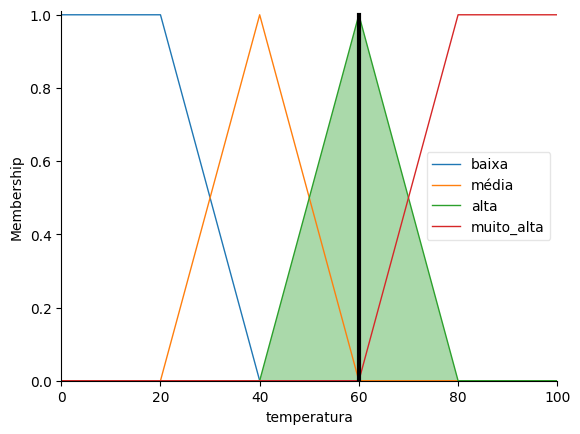

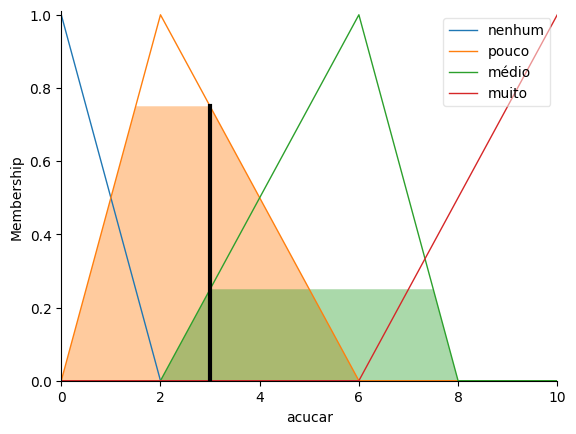

In [ ]:
 # Plotando os gráficos das funções de pertinência e do resultado
temperatura.view(simulador)
acucar.view(simulador)

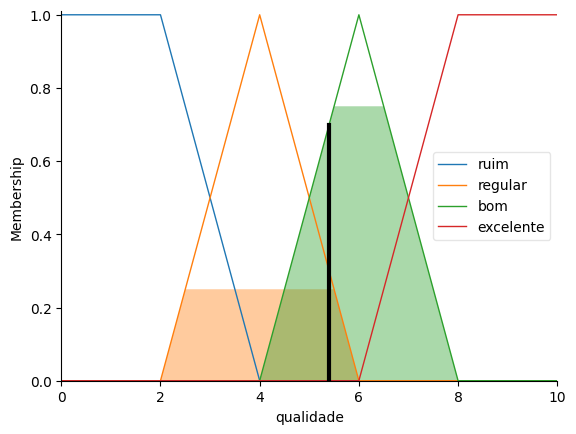

In [ ]:
qualidade.view(simulador)